<a href="https://colab.research.google.com/github/amirrezasokhankhosh/Fuel-Consumption/blob/main/FuelConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

%matplotlib inline

### Downloading Data

To download the data, we will use urllib to download it from IBM Object Storage.


In [2]:
import os
from six.moves import urllib

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'
   
urllib.request.urlretrieve(URL, 'FuelConsumption.csv')

print('File downloaded and saved.')

File downloaded and saved.


## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

Lets first have a descriptive exploration on our data.


In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


we can plot each of these fearues:


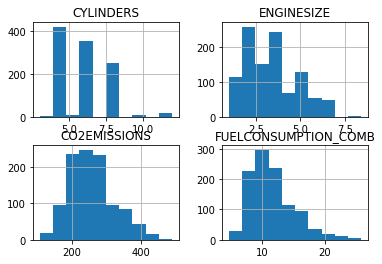

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:


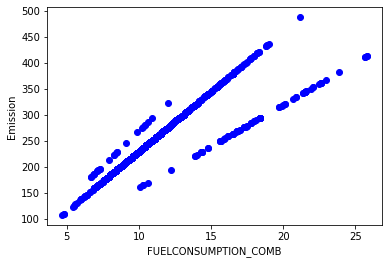

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

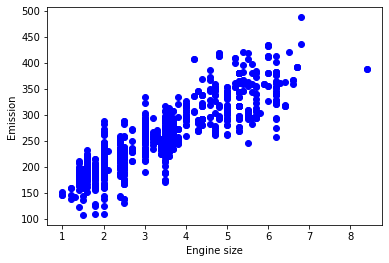

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 70% of the entire data for training, and the 30% for testing.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

# msk = np.random.rand(len(df)) < 0.8
# train = cdf[msk]
# test = cdf[~msk]

y_col = "CO2EMISSIONS"

X = cdf.drop(y_col, axis=1)
Y = cdf[y_col]

degree = 20
pf = PolynomialFeatures(degree)

X_poly = pf.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.3, 
                                                    random_state=72018)

## Question 5

* We write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. We use sklearn's `mean_squared_error`.  

In [10]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

In [11]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model. 

In [12]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, Y_train)

linearRegression_rmse = rmse(Y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

44226.54591176147


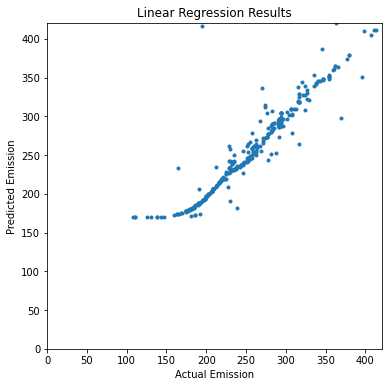

In [13]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(Y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, Y_test.max())

ax.set(xlabel='Actual Emission', 
       ylabel='Predicted Emission', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

In [14]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, Y_train)

ridgeCV_rmse = rmse(Y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

0.005 223.2102480989654


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [15]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=1e2,
                  cv=3).fit(X_train, Y_train)

lassoCV_rmse = rmse(Y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

0.0005 18.11795695808526


We can determine how many of these features remain non-zero.

In [16]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 1771 coefficients, 1770 are non-zero with Lasso.


Now try the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

In [17]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e2).fit(X_train, Y_train)
elasticNetCV_rmse = rmse(Y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.9 18.117651902052653


Comparing the RMSE calculation from all models is easiest in a table.

In [18]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,44226.545912
Ridge,223.210248
Lasso,18.117957
ElasticNet,18.117652


We can also make a plot of actual vs predicted emission as before.

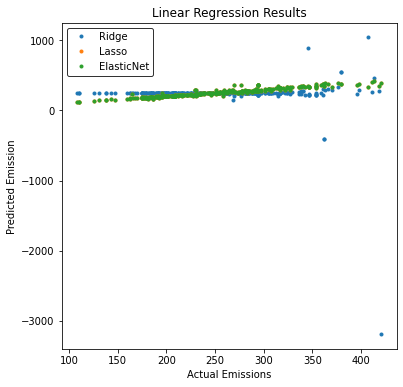

In [20]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(Y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Emissions', 
       ylabel='Predicted Emission', 
       title='Linear Regression Results');
plt.show()

Based on the score of RMSE, ElasticNet and Lasso are the better option.